In [3]:
# --- Import Libraries ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load and Sample Data (to speed things up) ---
df = pd.read_csv("fixed.csv").sample(n=10000, random_state=42)

# --- Data Preparation ---
model_data = df[['Year', 'Month', 'COVID-19 Deaths', 'Number of Mentions']].copy()
threshold = model_data['COVID-19 Deaths'].median()
model_data['High_Death'] = (model_data['COVID-19 Deaths'] > threshold).astype(int)
model_data.drop(columns='COVID-19 Deaths', inplace=True)

X = model_data.drop(columns='High_Death')
y = model_data['High_Death']

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Visualizations ---
sns.histplot(X_train['Number of Mentions'], kde=True).set_title("Train: Number of Mentions")
plt.savefig("training_sample_plot.png")
plt.clf()

sns.histplot(X_test['Number of Mentions'], kde=True, color='orange').set_title("Test: Number of Mentions")
plt.savefig("testing_sample_plot.png")
plt.clf()

# --- Train Logistic Regression (fast) ---
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

# --- Evaluate ---
y_pred = clf.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[1499    0]
 [ 451   50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      1499
           1       1.00      0.10      0.18       501

    accuracy                           0.77      2000
   macro avg       0.88      0.55      0.53      2000
weighted avg       0.83      0.77      0.70      2000


Accuracy Score: 0.7745


<Figure size 640x480 with 0 Axes>

In [4]:
# --- Import Libraries ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load and Sample Data (for speed) ---
df = pd.read_csv("fixed.csv").sample(n=10000, random_state=42)

# --- Data Preparation ---
model_data = df[['Year', 'Month', 'COVID-19 Deaths', 'Number of Mentions']].copy()
threshold = model_data['COVID-19 Deaths'].median()
model_data['High_Death'] = (model_data['COVID-19 Deaths'] > threshold).astype(int)
model_data.drop(columns='COVID-19 Deaths', inplace=True)

X = model_data.drop(columns='High_Death')
y = model_data['High_Death']

# --- Split into Disjoint Train/Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Save Small Samples of Train/Test Sets ---
train_sample = X_train.copy()
train_sample['Label'] = y_train
test_sample = X_test.copy()
test_sample['Label'] = y_test
train_sample.head(5).to_csv("training_sample.csv", index=False)
test_sample.head(5).to_csv("testing_sample.csv", index=False)

# --- Feature Scaling (SVM Requirement) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Visualize Distributions ---
sns.histplot(X_train['Number of Mentions'], kde=True).set_title("Train: Number of Mentions")
plt.savefig("training_sample_plot.png")
plt.clf()

sns.histplot(X_test['Number of Mentions'], kde=True, color='orange').set_title("Test: Number of Mentions")
plt.savefig("testing_sample_plot.png")
plt.clf()

# --- Train SVM Model ---
clf = SVC(kernel='linear', max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

# --- Evaluate Model ---
y_pred = clf.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[830 669]
 [139 362]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.55      0.67      1499
           1       0.35      0.72      0.47       501

    accuracy                           0.60      2000
   macro avg       0.60      0.64      0.57      2000
weighted avg       0.73      0.60      0.62      2000


Accuracy Score: 0.596


C:\Users\saahi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

In [5]:
# --- Import Libraries ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- Load and Sample Data ---
df = pd.read_csv("fixed.csv").sample(n=10000, random_state=42)

# --- Feature Selection and Encoding ---
df = df[['Year', 'Month', 'Number of Mentions', 'COVID-19 Deaths',
         'State', 'Age Group', 'Condition Group']]
df = pd.get_dummies(df, columns=['State', 'Age Group', 'Condition Group'])

# --- Create Binary Target ---
threshold = df['COVID-19 Deaths'].median()
df['High_Death'] = (df['COVID-19 Deaths'] > threshold).astype(int)
df.drop(columns='COVID-19 Deaths', inplace=True)

# --- Define Features and Target ---
X = df.drop(columns='High_Death')
y = df['High_Death']

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Scale Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train SVM with RBF Kernel ---
clf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
clf.fit(X_train_scaled, y_train)

# --- Evaluate ---
y_pred = clf.predict(X_test_scaled)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.9105

Confusion Matrix:
 [[1499    0]
 [ 179  322]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      1499
           1       1.00      0.64      0.78       501

    accuracy                           0.91      2000
   macro avg       0.95      0.82      0.86      2000
weighted avg       0.92      0.91      0.90      2000




SVM Kernel Accuracy Summary:
Linear   | Best C: 10 | Accuracy: 0.9345
Rbf      | Best C: 10 | Accuracy: 0.9155
Poly     | Best C: 1 | Accuracy: 0.9100


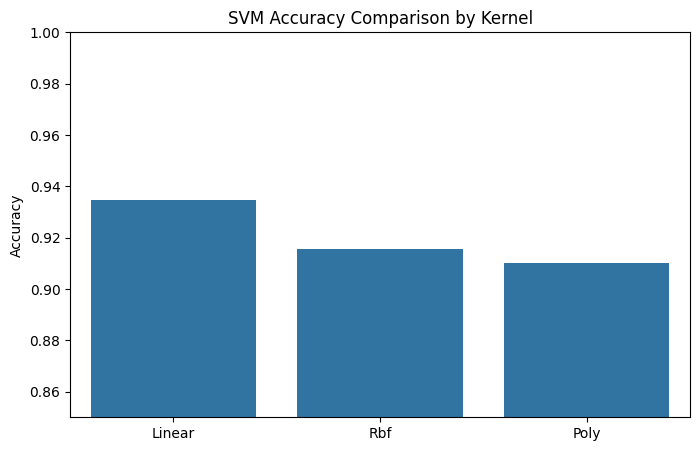

In [6]:
# --- Import Libraries ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load and Sample Data ---
df = pd.read_csv("fixed.csv").sample(n=10000, random_state=42)

# --- Feature Selection and Encoding ---
df = df[['Year', 'Month', 'Number of Mentions', 'COVID-19 Deaths',
         'State', 'Age Group', 'Condition Group']]
df = pd.get_dummies(df, columns=['State', 'Age Group', 'Condition Group'])

# --- Create Binary Target ---
threshold = df['COVID-19 Deaths'].median()
df['High_Death'] = (df['COVID-19 Deaths'] > threshold).astype(int)
df.drop(columns='COVID-19 Deaths', inplace=True)

# --- Define Features and Target ---
X = df.drop(columns='High_Death')
y = df['High_Death']

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Scale Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Try SVM with Different Kernels and C Values ---
kernels = ['linear', 'rbf', 'poly']
cost_values = [0.1, 1, 10]
results = []

for kernel in kernels:
    for C in cost_values:
        clf = SVC(kernel=kernel, C=C, gamma='scale', random_state=42)
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        results.append({
            'kernel': kernel,
            'C': C,
            'accuracy': acc,
            'confusion_matrix': cm
        })

# --- Find Best Accuracy per Kernel ---
best_per_kernel = {}
for r in results:
    k = r['kernel']
    if k not in best_per_kernel or r['accuracy'] > best_per_kernel[k]['accuracy']:
        best_per_kernel[k] = r

# --- Visualize Confusion Matrices ---
for k, r in best_per_kernel.items():
    plt.figure()
    sns.heatmap(r['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f"{k.upper()} Kernel (C={r['C']})\nAccuracy: {r['accuracy']:.3f}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(f"conf_matrix_{k}.png")
    plt.close()

# --- Print Summary Table ---
print("\nSVM Kernel Accuracy Summary:")
for k, r in best_per_kernel.items():
    print(f"{k.capitalize():<8} | Best C: {r['C']} | Accuracy: {r['accuracy']:.4f}")

# --- Optional: Create a bar plot comparing accuracies ---
plt.figure(figsize=(8, 5))
sns.barplot(x=[k.capitalize() for k in best_per_kernel.keys()],
            y=[r['accuracy'] for r in best_per_kernel.values()])
plt.title("SVM Accuracy Comparison by Kernel")
plt.ylabel("Accuracy")
plt.ylim(0.85, 1.00)
plt.savefig("svm_accuracy_comparison.png")
plt.show()


In [1]:
import numpy as np

# Original 2D point
x = np.array([2, 3])
x1, x2 = x

# Polynomial kernel parameters
r = 1  # bias term
d = 2  # degree

# Expanded feature mapping using polynomial kernel (manual transformation)
phi = [
    x1**2,
    np.sqrt(2) * x1 * x2,
    x2**2,
    np.sqrt(2) * x1,
    np.sqrt(2) * x2,
    1
]

# Output mapped feature vector
print("Original 2D point:", x)
print("Mapped to 6D (polynomial kernel r=1, d=2):", np.round(phi, 2))


Original 2D point: [2 3]
Mapped to 6D (polynomial kernel r=1, d=2): [4.   8.49 9.   2.83 4.24 1.  ]


In [7]:
# Print first 5 rows of training data
print("Training Data:")
print(X_train.head())
print(y_train.head())

# Print first 5 rows of testing data
print("\nTesting Data:")
print(X_test.head())
print(y_test.head())


Training Data:
        Year  Month  Number of Mentions  State_Alabama  State_Alaska  \
442067  2022      9                 0.0          False         False   
164615  2020      6                 0.0          False         False   
176502  2021      1                 0.0          False         False   
313621  2021      5                 0.0          False         False   
45852   2020      1                16.0          False         False   

        State_Arizona  State_Arkansas  State_California  State_Colorado  \
442067          False           False             False           False   
164615          False           False             False           False   
176502          False           False             False           False   
313621          False           False             False           False   
45852           False           False             False           False   

        State_Connecticut  ...  Condition Group_COVID-19  \
442067              False  ...           

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for kernel, result in best_per_kernel.items():
    cm = result['confusion_matrix']
    acc = result['accuracy']
    C_val = result['C']
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r',
                xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
    plt.title(f"{kernel.upper()} SVM Confusion Matrix (C={C_val})\nAccuracy: {acc:.3f}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(f"{kernel}_svm_conf_matrix.png")
    plt.close()



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# This assumes `best_per_kernel` already exists from previous SVM evaluation

for kernel, result in best_per_kernel.items():
    cm = result['confusion_matrix']
    acc = result['accuracy']
    C_val = result['C']
    
    # --- Print confusion matrix and accuracy ---
    print(f"\n{kernel.upper()} KERNEL (C = {C_val})")
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {acc:.4f}")

    # --- Plot confusion matrix ---
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r',
                xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
    plt.title(f"{kernel.upper()} SVM Confusion Matrix (C={C_val})\nAccuracy: {acc:.3f}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(f"{kernel}_svm_conf_matrix.png")
    plt.close()



LINEAR KERNEL (C = 10)
Confusion Matrix:
[[1493    6]
 [ 125  376]]
Accuracy: 0.9345

RBF KERNEL (C = 10)
Confusion Matrix:
[[1442   57]
 [ 112  389]]
Accuracy: 0.9155

POLY KERNEL (C = 1)
Confusion Matrix:
[[1498    1]
 [ 179  322]]
Accuracy: 0.9100
